# Pandas Aggregating Warmup

### Do your work in whatever format you feel most comfortable with (notebook, repl, etc). Get the data from the_data.csv into a data frame (you can click the "Raw" button in the upper left corner to download the data). Make sure timestamp is a datetime type and set it as the index. Answer the questions below:

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv('the_data.csv')

In [3]:
df.head()

,timestamp,x,y
0,2018-04-30 00:00:00,1.84,A
1,2018-04-30 01:00:00,1.47,C
2,2018-04-30 02:00:00,0.20,B
3,2018-04-30 03:00:00,0.17,C
4,2018-04-30 04:00:00,2.06,C


In [4]:
df.shape

(48, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
timestamp    48 non-null object
x            48 non-null float64
y            48 non-null object
dtypes: float64(1), object(2)
memory usage: 1.2+ KB


In [6]:
df['timestamp']= pd.to_datetime(df['timestamp']) 

In [7]:
df = df.sort_values('timestamp').set_index('timestamp')

## By Group:

What is the maximum x value for group B?

1.91

In [8]:
df.iloc[np.where(df.y == 'B')].max()

x    1.91
y       B
dtype: object

What is the average x value for group A?

-0.110556

In [9]:
df.iloc[np.where(df.y == 'A')].mean()

x   -0.110556
dtype: float64

What is the minimum x value for group C?

-1.83

In [10]:
df.iloc[np.where(df.y == 'C')].min()

x   -1.83
y       C
dtype: object

Which group has the highest sum of x values?

Group C has the highest sum.

In [11]:
df.groupby('y').x.sum().idxmax()

'C'

## Time Aggregates:

What is the sum of the x values for 2018-05-01?

-4.02

In [18]:
df['2018-05-01'].x.sum()

-4.02

What is the average x value for each day? The median?

In [19]:
df.resample('D').mean()

,x
timestamp,
2018-04-30,0.2200
2018-05-01,-0.1675


In [20]:
df.resample('D').median()

,x
timestamp,
2018-04-30,0.175
2018-05-01,0.220


Which day has the largest x value?

In [23]:
df.resample('D').x.max().idxmax()

Timestamp('2018-04-30 00:00:00', freq='D')

Which day has the smallest x value for group C?

In [24]:
df.iloc[np.where(df.y == 'C')].min()

x   -1.83
y       C
dtype: object

In [25]:
df[df.x == -1.83]

,x,y
timestamp,,
2018-05-01 19:00:00,-1.83,C


## Visualization

Visualize the minimum x value of each group with a bar chart.

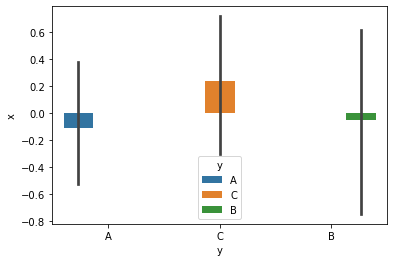

In [26]:
sns.barplot(x=df.y , y=df.x, data=df, hue=df.y)

Visualize x over time.

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


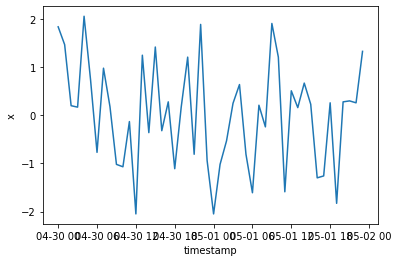

In [27]:
ax = sns.lineplot(x=df.index,y=df.x,data=df)

Visualize x over time by y value.

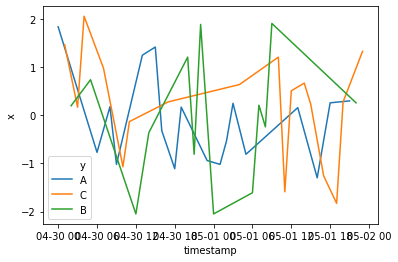

In [28]:
ax = sns.lineplot(x=df.index,y=df.x,data=df, hue=df.y)

## More Aggregation

What is the least frequent y value for 2018-04-30?

In [ ]:
df.resample('D').count()

In [ ]:
df.groupby('y').count()

What is the most frequent y value for each day?